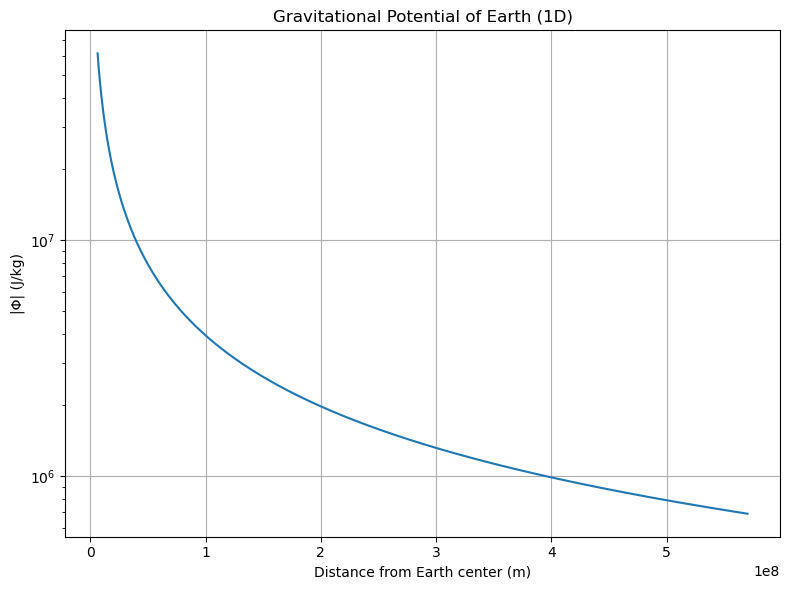

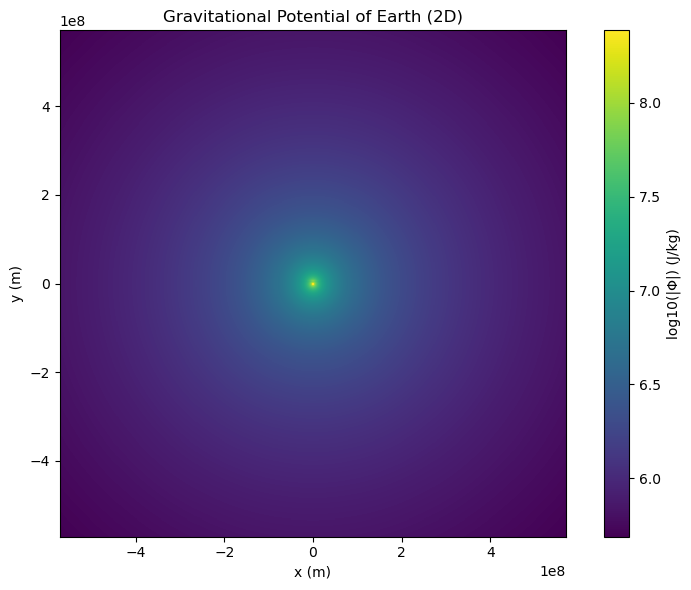

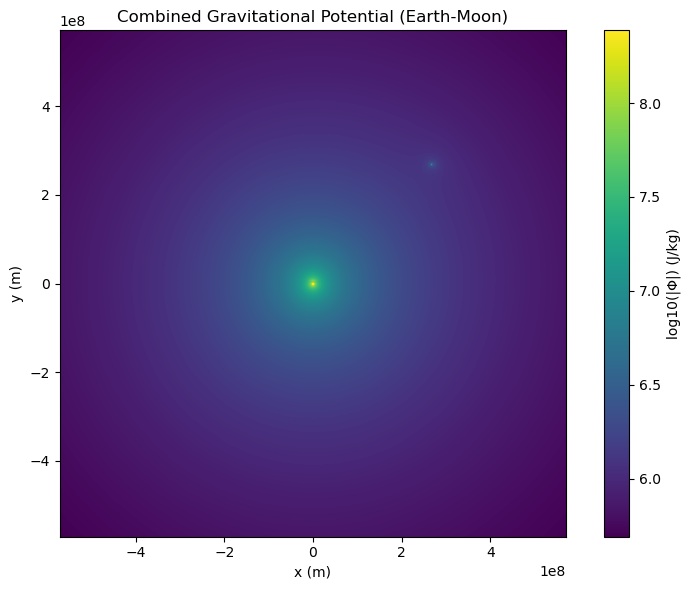

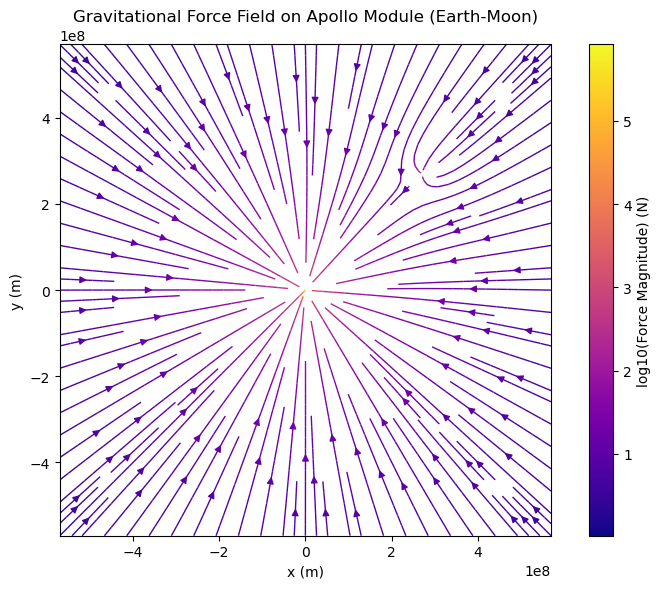

Computed burn time T: 157.69 s


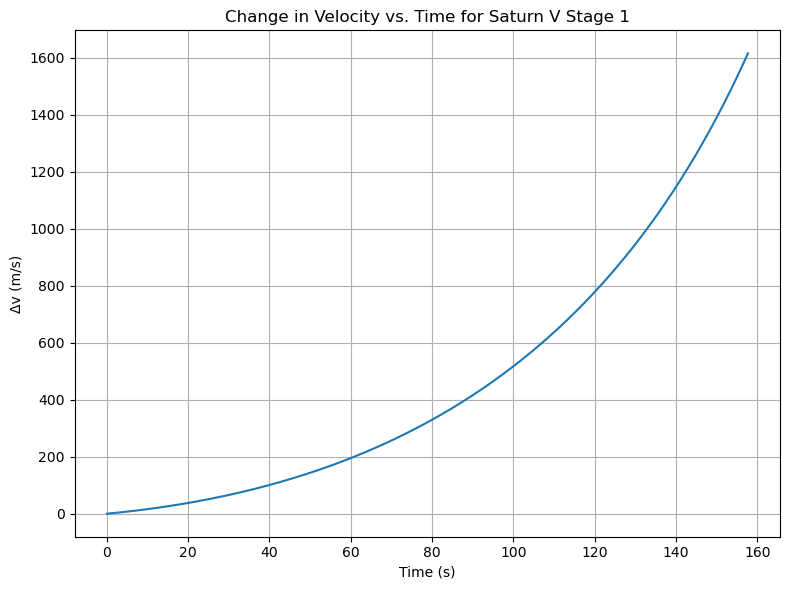

Computed altitude at burnout: 74.09 km
Burn time T: 157.69 s
Altitude at burnout: 74.09 km


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad 

G = 6.67e-11  
g = 9.81  
M_earth = 5.9e24  
M_moon = 7.3e22  
R_earth = 6378e3  
d_em = 3.8e8  
m0 = 2.8e6  
mf = 7.5e5  
m_dot = 1.3e4  
v_e = 2.4e3  
m_apollo = 5500  

def gravitational_potential(M, x_M, y_M, x, y):
    r = np.sqrt((x - x_M) ** 2 + (y - y_M) ** 2)
    r = np.where(r == 0, 1e-10, r)
    return -G * M / r

#1D Gravitational Potential Plot
x_values = np.linspace(R_earth, 1.5 * d_em, 1000)
phi_1d = gravitational_potential(M_earth, 0, 0, x_values, 0)

plt.figure(figsize=(8, 6))
plt.plot(x_values, np.abs(phi_1d))
plt.yscale('log')
plt.xlabel('Distance from Earth center (m)')
plt.ylabel('|Φ| (J/kg)')
plt.title('Gravitational Potential of Earth (1D)')
plt.grid(True)
plt.tight_layout()
plt.savefig("potential_1d.png")
plt.show()

#2D
grid_points = 500
x_grid = np.linspace(-1.5 * d_em, 1.5 * d_em, grid_points)
y_grid = np.linspace(-1.5 * d_em, 1.5 * d_em, grid_points)
X, Y = np.meshgrid(x_grid, y_grid)
phi_2d = gravitational_potential(M_earth, 0, 0, X, Y)

plt.figure(figsize=(8, 6))
pcm = plt.pcolormesh(X, Y, np.log10(np.abs(phi_2d) + 1e-20), shading='auto')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Gravitational Potential of Earth (2D)')
plt.colorbar(pcm, label='log10(|Φ|) (J/kg)')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig("potential_2d.png")
plt.show()

#Earth-Moon Gravitational Potential
def combined_potential(x, y):
    phi_earth = gravitational_potential(M_earth, 0, 0, x, y)
    moon_pos = d_em / np.sqrt(2)
    phi_moon = gravitational_potential(M_moon, moon_pos, moon_pos, x, y)
    return phi_earth + phi_moon

phi_combined = combined_potential(X, Y)

plt.figure(figsize=(8, 6))
pcm2 = plt.pcolormesh(X, Y, np.log10(np.abs(phi_combined) + 1e-20), shading='auto')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Combined Gravitational Potential (Earth-Moon)')
plt.colorbar(pcm2, label='log10(|Φ|) (J/kg)')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig("combined_potential_2d.png")
plt.show()

#Gravitational Force Field
def gravitational_force(M, x_M, y_M, m, x, y):
    dx = x - x_M
    dy = y - y_M
    r = np.sqrt(dx ** 2 + dy ** 2)
    r_safe = np.where(r == 0, 1e-10, r)
    F_mag = G * M * m / (r_safe ** 2)
    ux = dx / r_safe
    uy = dy / r_safe
    Fx = -F_mag * ux
    Fy = -F_mag * uy
    return Fx, Fy

Fx_earth, Fy_earth = gravitational_force(M_earth, 0, 0, m_apollo, X, Y)
moon_pos = d_em / np.sqrt(2)
Fx_moon, Fy_moon = gravitational_force(M_moon, moon_pos, moon_pos, m_apollo, X, Y)
Fx_total = Fx_earth + Fx_moon
Fy_total = Fy_earth + Fy_moon
F_magnitude = np.sqrt(Fx_total ** 2 + Fy_total ** 2)

plt.figure(figsize=(8, 6))
strm = plt.streamplot(X, Y, Fx_total, Fy_total, color=np.log10(F_magnitude + 1e-20), cmap='plasma', density=1.5, linewidth=1)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Gravitational Force Field on Apollo Module (Earth-Moon)')
plt.colorbar(strm.lines, label='log10(Force Magnitude) (N)')
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.savefig("force_streamplot.png")
plt.show()

#Saturn V Burn Time and Altitude Calculation
T_burn = (m0 - mf) / m_dot
print(f"Computed burn time T: {T_burn:.2f} s")

def delta_v(t, m0, m_dot, v_e, g, T_burn):
    if t > T_burn:
        t = T_burn
    m_t = m0 - m_dot * t
    m_t = max(m_t, 1e-10)
    return v_e * np.log(m0 / m_t) - g * t

t_values = np.linspace(0, T_burn, 500)
delta_v_values = np.array([delta_v(t, m0, m_dot, v_e, g, T_burn) for t in t_values])

plt.figure(figsize=(8, 6))
plt.plot(t_values, delta_v_values)
plt.xlabel('Time (s)')
plt.ylabel('Δv (m/s)')
plt.title('Change in Velocity vs. Time for Saturn V Stage 1')
plt.grid(True)
plt.tight_layout()
plt.savefig("delta_v_time.png")
plt.show()

altitude, alt_error = quad(lambda t: delta_v(t, m0, m_dot, v_e, g, T_burn), 0, T_burn)
print(f"Computed altitude at burnout: {altitude / 1000:.2f} km")
print(f"Burn time T: {T_burn:.2f} s")
print(f"Altitude at burnout: {altitude / 1000:.2f} km")
